In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Georgia Results

Uses data from https://results.enr.clarityelections.com/GA/105369/web.264614/#/detail/5000

In [2]:
df=pd.read_csv("detail.txt",
       delimiter=' ',
              skipinitialspace=True)

In [3]:
df

,County,Election-Day-Votes-DJT,Absentee-by-Mail-Votes-DJT,Advanced-Voting-Votes-DJT,Provisional-Votes-DJT,Choice-Total-DJT,Election-Day-Votes-JRB,Absentee-by-Mail-Votes-JRB,Advanced-Voting-Votes-JRB,Provisional-Votes-JRB,Choice-Total-JRB,Election-Day-Votes-JJ,Absentee-by-Mail-Votes-JJ,Advanced-Voting-Votes-JJ,Provisional-Votes-JJ,Choice-Total-JJ,Total,Unnamed: 17
0,Appling,1753,890,3874,9,6526,334,587,855,3,1779,5,5,26,0,36,8341,NaN
1,Atkinson,716,164,1419,1,2300,250,130,445,0,825,14,3,13,0,30,3155,NaN
2,Bacon,431,487,3099,1,4018,140,196,288,1,625,8,4,13,0,25,4668,NaN
3,Baker,291,138,466,2,897,149,234,269,0,652,2,2,2,0,6,1555,NaN
4,Baldwin,1873,1290,5736,4,8903,1527,3000,4612,1,9140,63,38,107,0,208,18251,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Whitfield,8963,3544,13084,45,25636,2814,2840,4997,19,10670,194,84,162,0,440,36746,NaN
155,Wilcox,743,343,1317,0,2403,285,212,365,0,862,8,2,6,0,16,3281,NaN
156,Wilkes,704,467,1649,3,2823,504,755,897,4,2160,16,10,20,0,46,5029,NaN
157,Wilkinson,1293,259,1109,3,2664,528,602,942,3,2075,17,4,10,0,31,4770,NaN


In [4]:
df['DJT-JRB']=df['Choice-Total-DJT']-df['Choice-Total-JRB']

In [5]:
dfa=df.copy()
dfa['DJT-cumsum']=np.cumsum(dfa['Choice-Total-DJT'])
dfa['JRB-cumsum']=np.cumsum(dfa['Choice-Total-JRB'])
dfa['cumsum-votes']=np.cumsum(dfa['Total'])

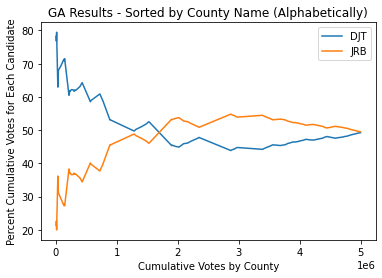

In [6]:
plt.plot(list(dfa['cumsum-votes']),list(dfa['DJT-cumsum']/dfa['cumsum-votes']*100),
         label="DJT")
plt.plot(list(dfa['cumsum-votes']),list(dfa['JRB-cumsum']/dfa['cumsum-votes']*100),
         label="JRB")
plt.legend()
plt.xlabel("Cumulative Votes by County")
plt.ylabel("Percent Cumulative Votes for Each Candidate");
plt.title("GA Results - Sorted by County Name (Alphabetically)")
plt.savefig('GA-alphabetical.jpg')

In [7]:
#df2=df.sort_values(by=['Total'],ascending=True)
df2=df.sort_values(by=['DJT-JRB'],ascending=False)


df2['DJT-cumsum']=np.cumsum(df2['Choice-Total-DJT'])
df2['JRB-cumsum']=np.cumsum(df2['Choice-Total-JRB'])
df2['cumsum-votes']=np.cumsum(df2['Total'])

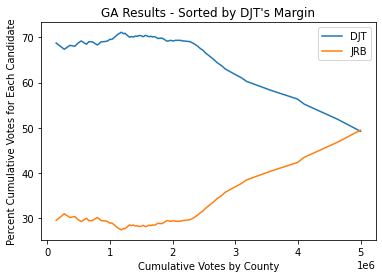

In [8]:
plt.plot(list(df2['cumsum-votes']),list(df2['DJT-cumsum']/df2['cumsum-votes']*100),
         label="DJT")
plt.plot(list(df2['cumsum-votes']),list(df2['JRB-cumsum']/df2['cumsum-votes']*100),
         label="JRB")
plt.legend()
plt.xlabel("Cumulative Votes by County")
plt.ylabel("Percent Cumulative Votes for Each Candidate");
plt.title("GA Results - Sorted by DJT's Margin")
plt.savefig('GA-DJT-margin.jpg')

In [9]:
df3=df.sort_values(by=['DJT-JRB'],ascending=True)


df3['DJT-cumsum']=np.cumsum(df3['Choice-Total-DJT'])
df3['JRB-cumsum']=np.cumsum(df3['Choice-Total-JRB'])
df3['cumsum-votes']=np.cumsum(df3['Total'])

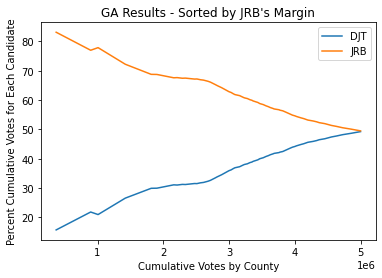

In [10]:
plt.plot(list(df3['cumsum-votes']),list(df3['DJT-cumsum']/df3['cumsum-votes']*100),
         label="DJT")
plt.plot(list(df3['cumsum-votes']),list(df3['JRB-cumsum']/df3['cumsum-votes']*100),
         label="JRB")
plt.legend()
plt.xlabel("Cumulative Votes by County")
plt.ylabel("Percent Cumulative Votes for Each Candidate");
plt.title("GA Results - Sorted by JRB's Margin")
plt.savefig('GA-JRB-margin.jpg')


## Arizona results

Data is from https://azsos.gov/sites/default/files/2020_General_State_Canvass.pdf

(I had to key it by hand.)

In [11]:
trumpAZ=[11442,35557,27052, 18377,10749,2433, 5129, 995665, 78535,27657,207758,
         107077,6194,91527,36534]
bidenAZ=[23293,23732,44698,8943,4034,1182,2236,1040774,24831,23383,304981,75106,13138,
        49602,32210]
totalAZ=[35776,60963,73968,28057,15113,3723,7522,2089563,105440,52490,526319,186319,
        19807,144911,70594]

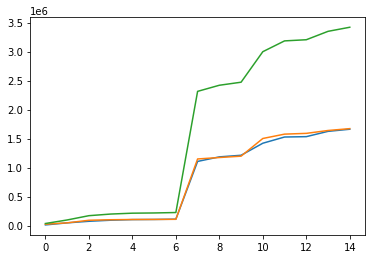

In [12]:
plt.plot(np.cumsum(trumpAZ))
plt.plot(np.cumsum(bidenAZ))
plt.plot(np.cumsum(totalAZ))

In [13]:
np.sum(trumpAZ), np.sum(bidenAZ), np.sum(totalAZ)

(1661686, 1672143, 3420565)

In [14]:
AZ=pd.DataFrame(trumpAZ,columns=['DJT'])

In [15]:
AZ['JRB']=bidenAZ
AZ['total']=totalAZ
AZ

,DJT,JRB,total
0,11442,23293,35776
1,35557,23732,60963
2,27052,44698,73968
3,18377,8943,28057
4,10749,4034,15113
5,2433,1182,3723
6,5129,2236,7522
7,995665,1040774,2089563
8,78535,24831,105440
9,27657,23383,52490


In [16]:
AZ1=AZ.copy()
AZ1['DJT-cumsum']=np.cumsum(AZ1['DJT'])
AZ1['JRB-cumsum']=np.cumsum(AZ1['JRB'])
AZ1['cumsum-votes']=np.cumsum(AZ1['total'])
AZ1

,DJT,JRB,total,DJT-cumsum,JRB-cumsum,cumsum-votes
0,11442,23293,35776,11442,23293,35776
1,35557,23732,60963,46999,47025,96739
2,27052,44698,73968,74051,91723,170707
3,18377,8943,28057,92428,100666,198764
4,10749,4034,15113,103177,104700,213877
5,2433,1182,3723,105610,105882,217600
6,5129,2236,7522,110739,108118,225122
7,995665,1040774,2089563,1106404,1148892,2314685
8,78535,24831,105440,1184939,1173723,2420125
9,27657,23383,52490,1212596,1197106,2472615


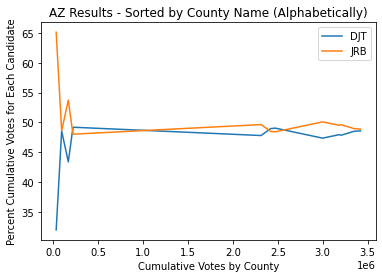

In [17]:
plt.plot(list(AZ1['cumsum-votes']),list(AZ1['DJT-cumsum']/AZ1['cumsum-votes']*100),
         label="DJT")
plt.plot(list(AZ1['cumsum-votes']),list(AZ1['JRB-cumsum']/AZ1['cumsum-votes']*100),
         label="JRB")
plt.legend()
plt.xlabel("Cumulative Votes by County")
plt.ylabel("Percent Cumulative Votes for Each Candidate");
plt.title("AZ Results - Sorted by County Name (Alphabetically)")
plt.savefig('AZ-alphabetical.jpg')



In [18]:
AZ['DJT-JRB']=AZ['DJT']-AZ['JRB']

In [19]:
AZ2=AZ.sort_values(by=['DJT-JRB'],ascending=True)


AZ2['DJT-cumsum']=np.cumsum(AZ2['DJT'])
AZ2['JRB-cumsum']=np.cumsum(AZ2['JRB'])
AZ2['cumsum-votes']=np.cumsum(AZ2['total'])

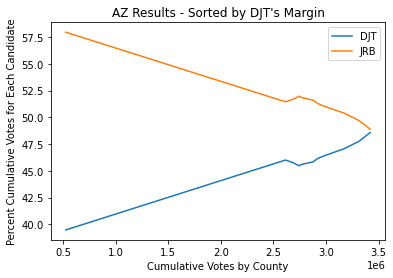

In [20]:
plt.plot(list(AZ2['cumsum-votes']),list(AZ2['DJT-cumsum']/AZ2['cumsum-votes']*100),
         label="DJT")
plt.plot(list(AZ2['cumsum-votes']),list(AZ2['JRB-cumsum']/AZ2['cumsum-votes']*100),
         label="JRB")
plt.legend()
plt.xlabel("Cumulative Votes by County")
plt.ylabel("Percent Cumulative Votes for Each Candidate");
plt.title("AZ Results - Sorted by DJT's Margin")
plt.savefig('AZ-JRB-margin.jpg')





In [21]:
AZ3=AZ.sort_values(by=['DJT-JRB'],ascending=False)


AZ3['DJT-cumsum']=np.cumsum(AZ3['DJT'])
AZ3['JRB-cumsum']=np.cumsum(AZ3['JRB'])
AZ3['cumsum-votes']=np.cumsum(AZ3['total'])

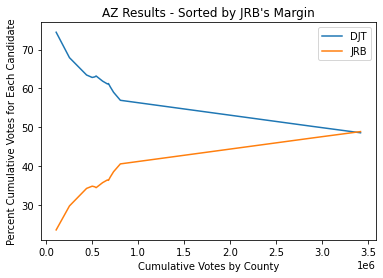

In [22]:
plt.plot(list(AZ3['cumsum-votes']),list(AZ3['DJT-cumsum']/AZ3['cumsum-votes']*100),
         label="DJT")
plt.plot(list(AZ3['cumsum-votes']),list(AZ3['JRB-cumsum']/AZ3['cumsum-votes']*100),
         label="JRB")
plt.legend()
plt.xlabel("Cumulative Votes by County")
plt.ylabel("Percent Cumulative Votes for Each Candidate");
plt.title("AZ Results - Sorted by JRB's Margin")
plt.savefig('AZ-DJT-margin.jpg')



